<a href="https://colab.research.google.com/github/aproca/XAI_course_labs/blob/main/Lab2_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: SHAP (SHapley Additive exPlanations)

In [7]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

shap.initjs()

# Load California Housing dataset

We will use the California housing dataset from scikit-learn.
This is a regression problem:

- **Input features:** census and housing-related features for districts
- **Target:** median house value in that district

#### **Tasks**:
1. Load the dataset with `fetch_california_housing(as_frame=True)`
2. Create variables: `X` (features), `y` (target), `feature_names`
3. Split into train/test sets (e.g. `test_size=0.2`)
4. Sample 100 training points (`X100`) as background distribution for SHAP


In [26]:
housing_dataset = fetch_california_housing(as_frame=True).frame
print(housing_dataset.shape)
housing_dataset.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
16512/housing_dataset.shape[0]

0.8

In [31]:
# TODO: Load the California housing dataset, create train/test sets, and inspect it.
# Set seed
seed = 88

# Set percentage of dataset to use as training data
train_size = 0.8
# Get stop index 
stop_index = int(housing_dataset.shape[0]*train_size)

# Split dataset into features and target variable
X, y = housing_dataset.drop(columns=['MedHouseVal']), housing_dataset['MedHouseVal']
X_train, X_test = X.iloc[:stop_index], X.iloc[stop_index:]
y_train, y_test = y[:stop_index], y[stop_index:]

# Get feature names
feature_names = X.columns.tolist()

# Sample 100 training examples as background distribution for SHAP
X100 = X_train.sample(n=100, random_state=seed)

print(f"Train shape: {X_train.shape}\nTest shape: {X_test.shape}")

Train shape: (16512, 8)
Test shape: (4128, 8)


# Part 1: Interpreting a Linear Regression model with SHAP

We start with linear regression:

- Easy to interpret globally (coefficients)
- Limited flexibility (may underfit non-linear patterns)

#### **Tasks**:
 1. Fit a `LinearRegression` model on the training set.
 2. Compute predictions on train and test.
 3. Report RMSE and R² on both train and test sets.



In [ ]:
# TODO: Train a LinearRegression model and evaluate it.


def regression_metrics(y_true, y_pred, prefix=""):
    # TODO: complete function-- compute, print, and return RMSE and R2
    
    return rmse, r2

Linear Regression performance:
Train RMSE: 0.723
Train R^2 : 0.609
Test  RMSE: 0.727
Test  R^2 : 0.594


(np.float64(0.7273129773603114), 0.5943232652466202)

#### **Questions**:
 - How do train and test RMSE / R² compare?
 - Do you see signs of overfitting, underfitting, or a reasonable fit?

## SHAP explanations – Linear Regression

SHAP (SHapley Additive exPlanations) assigns **feature attributions**
for individual predictions, based on a cooperative game theory analogy.

#### **Tasks**:

 1. Create a `shap.Explainer` for the linear regression model.
 2. Compute SHAP values on the test data.
 3. Visualize:
    - PDP (`shap.partial_dependence_plot`) with a shap value instance and scatter plot (`shap.plots.scatter`) of shap values
    - Global importance: `shap.plots.beeswarm`
    - Local explanation: `shap.waterfall_plot` for a single instance


We can create a partial dependence plot (PDP) to gain more intuition for SHAP. PDPs show how the expectation of the model output, conditioned on a specific feature, is affected by changes in that feature (i.e., as we change the value of a feature, how the expected output changes).

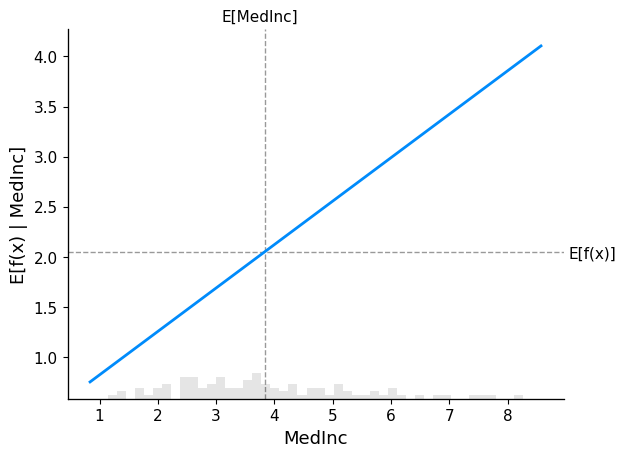

In [ ]:
# We can modify the feature we plot the PDP over
feature = "MedInc" # (change to different features)

shap.partial_dependence_plot(
    feature,
    linreg.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In linear models, SHAP values are just the difference between the expected model output and the PDP at the feature's value (plot 1 below): $E[f(x)|\text{feature}] - E[f(x)]$. This means that the SHAP value for a feature is just a mean-centered version of the PDP for that feature (plot 2 below).

ExactExplainer explainer: 4129it [00:19, 101.74it/s]                          


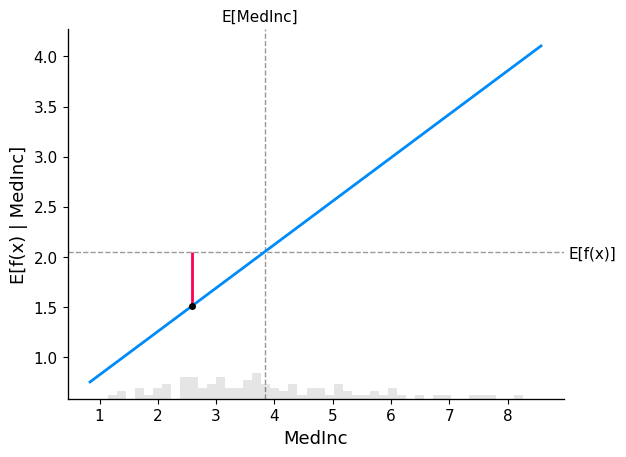

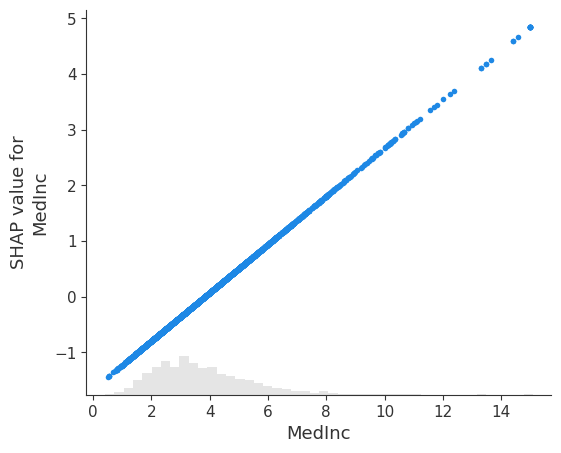

In [ ]:
# TODO: create shap.Explainer for linear regression model (using X100 datapoints), compute shap values on test data, 
# plot PDP with shap value instance and scatter plot of shap values



The beeswarm plot displays the distribution of SHAP values for each feature across all examples, with colors indicating how the SHAP values correlate with feature values. Here we have a *global* explanation of the test set.

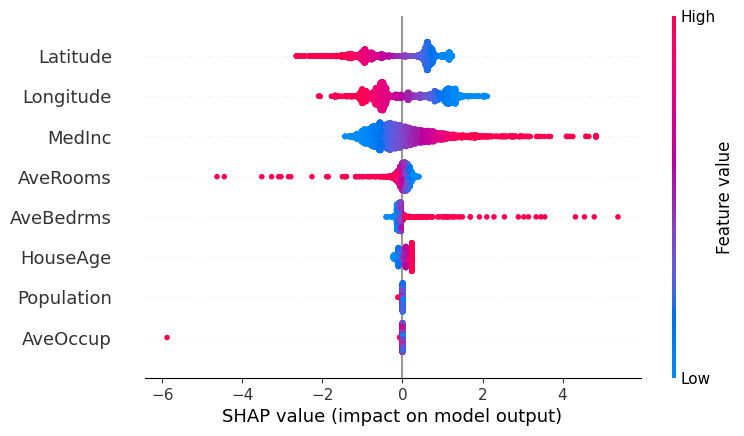

In [ ]:
# TODO: visualize beeswarm plot of shap values


SHAP values sum up to the difference between the expected model output ($E[f(X)]$) and the current model output ($f(x)$) for the prediction being explained (for a single datapoint $x$). We can see this by plotting a waterfall plot. Here we have a *local* explanation for a single instance.

In [2]:
# TODO: visualize waterfall plot for a single instance (change idx to inspect different datapoints),
# output true target and prediction

# Local explanation for a single test instance
idx = 20  # change to inspect different datapoints



#### **Questions: Interpreting SHAP for the linear model**

 1. From the beeswarm plot:
    - Which features are globally the most important?
    - Do the colors / directions match your intuition?  
 2. From the waterfall plot for a single instance:
    - Which features contribute most to raising or lowering the prediction
      relative to the base value?
    - Does the explanation seem consistent?

### Comparing SHAP to regression coefficients

 For linear models, we can look directly at:

 - Coefficients from `linreg.coef_`
 - SHAP global feature importance (mean |SHAP value|)

In [ ]:
# TODO: print model coefficients for features


Model coefficients:

MedInc : 0.43333
HouseAge : 0.00929
AveRooms : -0.09864
AveBedrms : 0.59322
Population : -1e-05
AveOccup : -0.00475
Latitude : -0.42145
Longitude : -0.43417


In [ ]:
# TODO: print mean |SHAP| values for features


Mean |SHAP| importance:

MedInc : 0.5986
HouseAge : 0.09846
AveRooms : 0.11706
AveBedrms : 0.10738
Population : 0.00538
AveOccup : 0.00418
Latitude : 0.82844
Longitude : 0.7834


#### **Questions**:
 Are they consistent? Can you think of reasons why they might differ?

# Part 2: SHAP with a more complex model: XGBoost

Now we train a nonlinear, tree-based model, **XGBoost**:
 - We expect better predictive performance (lower error, higher R²).
 - But the model is less transparent than a simple linear model.

#### **Tasks**:
 1. Train an `XGBRegressor` on the same data.
 2. Evaluate RMSE and R² on train and test.
 3. Compare performance to the Linear Regression model.


In [ ]:
# TODO: Train an XGBRegressor and evaluate it.
# Play around with hyperparameters to get a more or less performant model and see how that affects the resulting SHAP explanations


XGBoost performance:
Train RMSE: 0.439
Train R^2 : 0.856
Test  RMSE: 0.478
Test  R^2 : 0.825


(np.float64(0.47826851497038586), 0.82457923045811)

#### **Questions: Compare Linear vs XGBoost performance**

 - Which model has better test RMSE / R²?
 - Is XGBoost overfitting (train much better than test)? Can you adjust the model hyperparameters to improve this?


## SHAP explanations – XGBoost

#### **Tasks**:

 1. Create a `shap.Explainer` for the XGBoost model.
 2. Compute SHAP values on the same test set.
 3. Compare global and local explanations to the linear model.


In [ ]:
# TODO: create explainer for XGBoost model and compute shap values on test set


When dealing with linear models, PDPs are also linear. However, when we move to nonlinear models like XGBoost, we can use PDPs to visualize how a feature affects predictions across its range, potentially revealing nonlinear effects. Play around with different features and datapoints to observe some of these effects. Optionally, include a pair of interacting features.

 Compare how the effect looks for the linear model vs XGBoost.

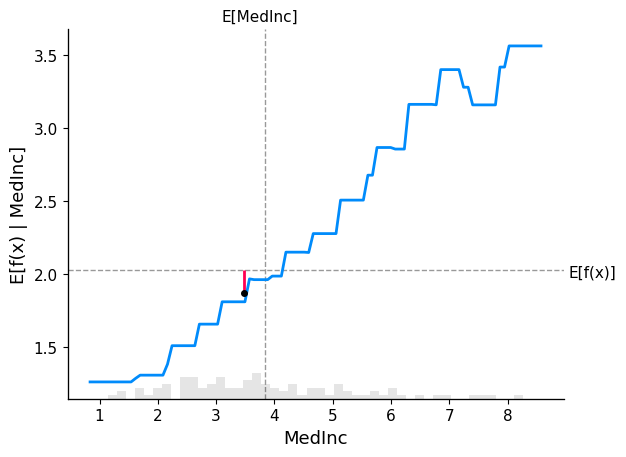

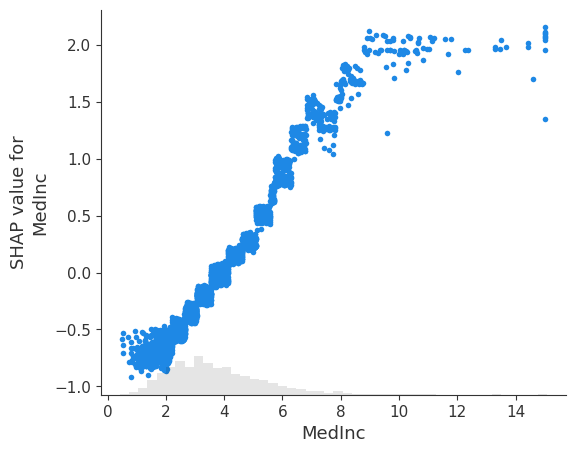

In [ ]:
# TODO: plot PDP with shap value instance and shap scatter plot for a feature. 
# Play around and visualize different features

feature_xgb = "MedInc" # (change to diffferent features)


#### **Questions**:
 - From the PDPs, does XGBoost capture nonlinear or interaction effects?
 - Would such effects be visible in the linear model?
 - How do these findings relate to the difference in predictive performance between the models?

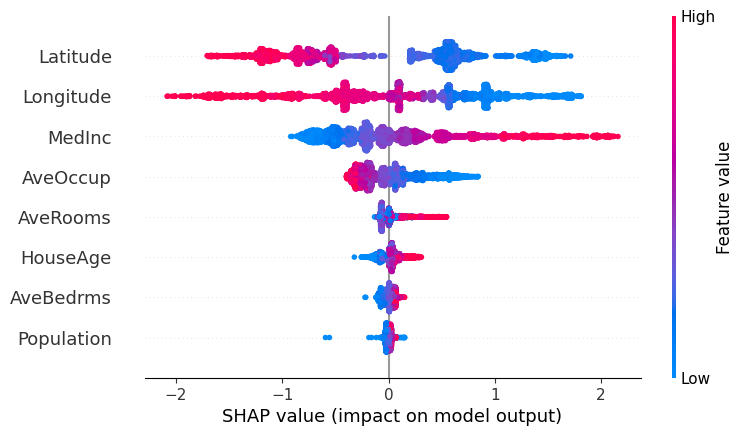

In [ ]:
# TODO: visualize beeswarm plot for XGBoost model
# Global feature importance for XGBoost


True target: 1.314
XGB prediction: 1.0979947


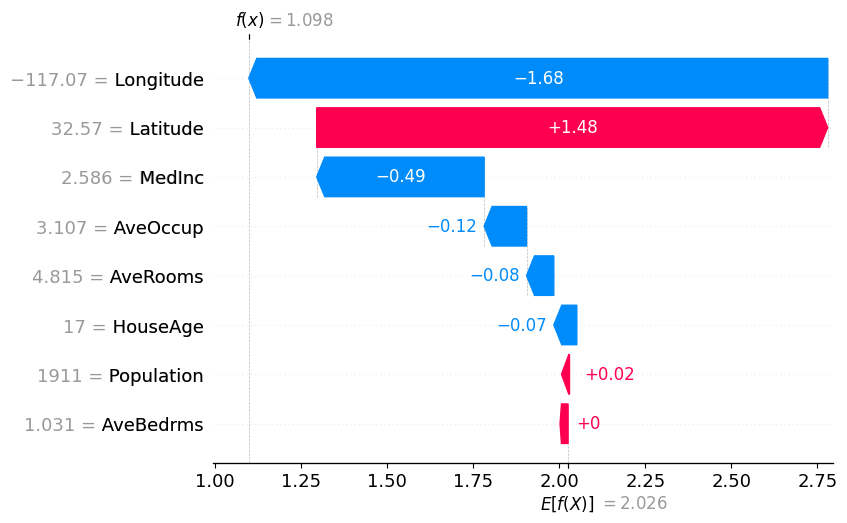

In [ ]:
# TODO: visualize waterfall plot for a single instance (change idx to inspect different datapoints)

# Local explanation for a single test instance
idx = 20  # change to inspect different datapoints


#### **Questions: Comparing SHAP explanations: Linear vs XGBoost**

 1. Compare **summary plots**:
    - Are the top 3–5 most important features the same?
    - Does XGBoost rely on additional features or different patterns?
 2. Compare **local explanations** for the *same* instance:
    - Do the top contributing features agree?
    - Are there differences due to nonlinear effects or interactions?
 3. Consider both performance *and* explanations

# Part 3: SHAP with correlated features

 SHAP assumes (roughly) that we can reason about the effect of a feature
 by "adding" or "removing" it while marginalizing over others.

 With strongly correlated features, the attribution can become ambiguous:

 - Two features carry similar information
 - The model may arbitrarily split credit between them
 - SHAP may assign importance in a way that doesn't match human intuition

#### **Tasks**:

 1. Construct a synthetic dataset with highly correlated features.
 2. Fit a RandomForest model (using `RandomForestRegressor`).
 3. Use SHAP to explain, and inspect how the importance is distributed.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Synthetic data with correlated features
rng = np.random.RandomState(0)
n = 1000

# Latent signal
z = rng.normal(size=n)

# Two highly correlated features
x1 =  rng.normal(scale=0.01, size=n) + z
x2 =  rng.normal(scale=0.01, size=n) + z

# Target depends *only* on x1 (but x2 is almost the same)
y_syn = 3 * x1 + rng.normal(scale=0.1, size=n)

X_syn = pd.DataFrame({"x1": x1, "x2": x2})
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(
    X_syn, y_syn, test_size=0.2, random_state=0
)

# TODO: fit and evaluate a RandomForest model on the synthetic data


Synthetic RF performance:
Test RMSE: 0.167
Test R^2 : 0.996


(np.float64(0.166617405062933), 0.9963674245725312)

 99%|===================| 4093/4128 [00:44<00:00]       

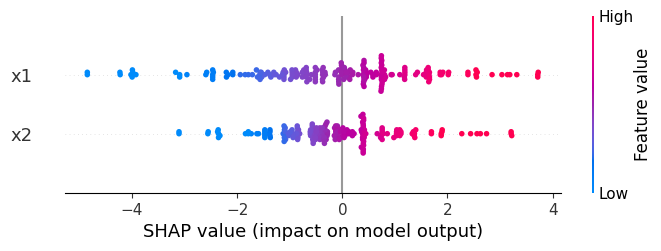

In [ ]:
# TODO: get explainer and shap values for random forest model on synthetic data, visualize beeswarm plot
# SHAP for the synthetic RF model


True target: 2.8878315561498735
Prediction: 2.7942707794331314


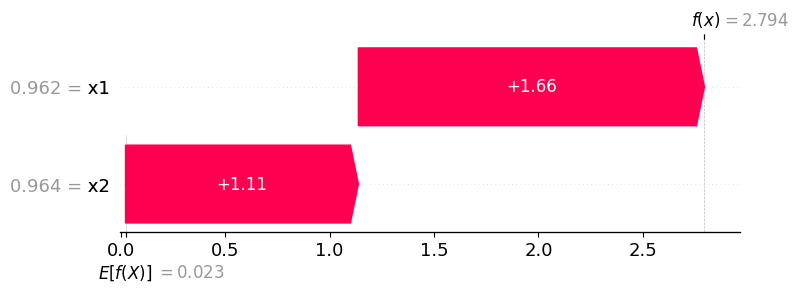

In [ ]:
# TODO: visualize waterfall plot for a single instance (change idx to inspect different datapoints),
# output true target and prediction

# Local explanation for a single test instance
idx = 5  # change to inspect different datapoints



#### **Questions: SHAP with correlated features**

 - In our data-generating process, only x1 truly matters for y.
 - x2 is just a noisy copy of x1.

 1. What do you observe in the SHAP summary plot?
    - Does SHAP assign importance to x2 even though it has no direct causal effect?
 2. In the local explanation:
    - How are contributions from x1 and x2 distributed?
 3. Why is it *inherently ambiguous* to attribute importance between x1 and x2 in this setting?